##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Addons Optimizers: ConditionalGradient


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/addons/tutorials/optimizers_conditionalgradient"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/addons/blob/master/docs/tutorials/optimizers_conditionalgradient.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/addons/blob/master/docs/tutorials/optimizers_conditionalgradient.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/addons/docs/tutorials/optimizers_conditionalgradient.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

# Overview
This notebook will demonstrate how to use the Conditional Graident Optimizer from the Addons package.

# ConditionalGradient


> Constraining the parameters of a neural network has been shown to be beneficial in training because of the underlying regularization effects.  Often, parameters are constrained via a soft penalty (which never guarantees the constraint satisfaction) or via a projection operation (which is computationally expensive). Conditional gradient (CG) optimizer, on the other hand, enforces the constraints strictly without the need for an expensive projection step. It works by minimizing a linear approximation of the objective within the constraint set. In this notebook, you demonstrate the appliction of Frobenius norm constraint via the CG optimizer on the MNIST dataset. CG is now available as a tensorflow API. More details of the optimizer are available at https://arxiv.org/pdf/1803.06453.pdf


## Setup

In [2]:
!pip install -U tensorflow-addons

  Using cached tensorflow_addons-0.17.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)


  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)


In [3]:
import tensorflow as tf
import tensorflow_addons as tfa
from matplotlib import pyplot as plt

In [4]:
# Hyperparameters
batch_size=64
epochs=10

# Build the Model

In [5]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(784,), activation='relu', name='dense_1'),
    tf.keras.layers.Dense(64, activation='relu', name='dense_2'),
    tf.keras.layers.Dense(10, activation='softmax', name='predictions'),
])

# Prep the Data

In [6]:
# Load MNIST dataset as NumPy arrays
dataset = {}
num_validation = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Define a Custom Callback Function

In [7]:
def frobenius_norm(m):
    """This function is to calculate the frobenius norm of the matrix of all
    layer's weight.
  
    Args:
        m: is a list of weights param for each layers.
    """
    total_reduce_sum = 0
    for i in range(len(m)):
        total_reduce_sum = total_reduce_sum + tf.math.reduce_sum(m[i]**2)
    norm = total_reduce_sum**0.5
    return norm

In [8]:
CG_frobenius_norm_of_weight = []
CG_get_weight_norm = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda batch, logs: CG_frobenius_norm_of_weight.append(
        frobenius_norm(model_1.trainable_weights).numpy()))

# Train and Evaluate: Using CG as Optimizer

Simply replace typical keras optimizers with the new tfa optimizer 

In [9]:
# Compile the model
model_1.compile(
    optimizer=tfa.optimizers.ConditionalGradient(
        learning_rate=0.99949, lambda_=203),  # Utilize TFA optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

history_cg = model_1.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    epochs=epochs,
    callbacks=[CG_get_weight_norm])

Epoch 1/10


  1/938 [..............................] - ETA: 10:34 - loss: 2.3234 - accuracy: 0.0469

 23/938 [..............................] - ETA: 2s - loss: 1.6707 - accuracy: 0.4857   

 46/938 [>.............................] - ETA: 1s - loss: 1.2789 - accuracy: 0.6019

 70/938 [=>............................] - ETA: 1s - loss: 1.0678 - accuracy: 0.6681

 94/938 [==>...........................] - ETA: 1s - loss: 0.9359 - accuracy: 0.7099

117/938 [==>...........................] - ETA: 1s - loss: 0.8592 - accuracy: 0.7366

139/938 [===>..........................] - ETA: 1s - loss: 0.7969 - accuracy: 0.7551

161/938 [====>.........................] - ETA: 1s - loss: 0.7489 - accuracy: 0.7714

184/938 [====>.........................] - ETA: 1s - loss: 0.7096 - accuracy: 0.7839

207/938 [=====>........................] - ETA: 1s - loss: 0.6708 - accuracy: 0.7963

231/938 [======>.......................] - ETA: 1s - loss: 0.6427 - accuracy: 0.8058

255/938 [=======>......................] - ETA: 1s - loss: 0.6165 - accuracy: 0.8131

280/938 [=======>......................] - ETA: 1s - loss: 0.5910 - accuracy: 0.8206

305/938 [========>.....................] - ETA: 1s - loss: 0.5729 - accuracy: 0.8257

330/938 [=========>....................] - ETA: 1s - loss: 0.5560 - accuracy: 0.8310

355/938 [==========>...................] - ETA: 1s - loss: 0.5423 - accuracy: 0.8355

380/938 [===========>..................] - ETA: 1s - loss: 0.5286 - accuracy: 0.8393

405/938 [===========>..................] - ETA: 1s - loss: 0.5173 - accuracy: 0.8426

430/938 [============>.................] - ETA: 1s - loss: 0.5055 - accuracy: 0.8460

455/938 [=============>................] - ETA: 1s - loss: 0.4945 - accuracy: 0.8491

480/938 [==============>...............] - ETA: 0s - loss: 0.4864 - accuracy: 0.8520

505/938 [===============>..............] - ETA: 0s - loss: 0.4788 - accuracy: 0.8546

530/938 [===============>..............] - ETA: 0s - loss: 0.4705 - accuracy: 0.8573

554/938 [================>.............] - ETA: 0s - loss: 0.4631 - accuracy: 0.8594

579/938 [=================>............] - ETA: 0s - loss: 0.4555 - accuracy: 0.8618

604/938 [==================>...........] - ETA: 0s - loss: 0.4492 - accuracy: 0.8637

629/938 [===================>..........] - ETA: 0s - loss: 0.4440 - accuracy: 0.8655

654/938 [===================>..........] - ETA: 0s - loss: 0.4364 - accuracy: 0.8680

679/938 [====================>.........] - ETA: 0s - loss: 0.4304 - accuracy: 0.8698

703/938 [=====================>........] - ETA: 0s - loss: 0.4257 - accuracy: 0.8711

728/938 [======================>.......] - ETA: 0s - loss: 0.4205 - accuracy: 0.8726

753/938 [=======================>......] - ETA: 0s - loss: 0.4159 - accuracy: 0.8742

778/938 [=======================>......] - ETA: 0s - loss: 0.4111 - accuracy: 0.8758

803/938 [========================>.....] - ETA: 0s - loss: 0.4054 - accuracy: 0.8777

828/938 [=========================>....] - ETA: 0s - loss: 0.4005 - accuracy: 0.8792

853/938 [==========================>...] - ETA: 0s - loss: 0.3965 - accuracy: 0.8805

878/938 [===========================>..] - ETA: 0s - loss: 0.3915 - accuracy: 0.8818

903/938 [===========================>..] - ETA: 0s - loss: 0.3869 - accuracy: 0.8832

928/938 [============================>.] - ETA: 0s - loss: 0.3827 - accuracy: 0.8846

938/938 [==============================] - 3s 3ms/step - loss: 0.3808 - accuracy: 0.8852 - val_loss: 0.2282 - val_accuracy: 0.9301


Epoch 2/10


  1/938 [..............................] - ETA: 2s - loss: 0.1732 - accuracy: 0.9531

 25/938 [..............................] - ETA: 1s - loss: 0.2095 - accuracy: 0.9350

 49/938 [>.............................] - ETA: 1s - loss: 0.2041 - accuracy: 0.9416

 73/938 [=>............................] - ETA: 1s - loss: 0.2079 - accuracy: 0.9414

 97/938 [==>...........................] - ETA: 1s - loss: 0.2175 - accuracy: 0.9367

121/938 [==>...........................] - ETA: 1s - loss: 0.2190 - accuracy: 0.9350

145/938 [===>..........................] - ETA: 1s - loss: 0.2110 - accuracy: 0.9371

170/938 [====>.........................] - ETA: 1s - loss: 0.2089 - accuracy: 0.9384

194/938 [=====>........................] - ETA: 1s - loss: 0.2074 - accuracy: 0.9383

218/938 [=====>........................] - ETA: 1s - loss: 0.2086 - accuracy: 0.9385

242/938 [======>.......................] - ETA: 1s - loss: 0.2082 - accuracy: 0.9383

267/938 [=======>......................] - ETA: 1s - loss: 0.2089 - accuracy: 0.9379

291/938 [========>.....................] - ETA: 1s - loss: 0.2094 - accuracy: 0.9378

316/938 [=========>....................] - ETA: 1s - loss: 0.2087 - accuracy: 0.9377

341/938 [=========>....................] - ETA: 1s - loss: 0.2077 - accuracy: 0.9382

365/938 [==========>...................] - ETA: 1s - loss: 0.2083 - accuracy: 0.9378

390/938 [===========>..................] - ETA: 1s - loss: 0.2073 - accuracy: 0.9381

415/938 [============>.................] - ETA: 1s - loss: 0.2071 - accuracy: 0.9378

440/938 [=============>................] - ETA: 1s - loss: 0.2072 - accuracy: 0.9376

464/938 [=============>................] - ETA: 0s - loss: 0.2066 - accuracy: 0.9379

488/938 [==============>...............] - ETA: 0s - loss: 0.2065 - accuracy: 0.9378

513/938 [===============>..............] - ETA: 0s - loss: 0.2056 - accuracy: 0.9382

538/938 [================>.............] - ETA: 0s - loss: 0.2041 - accuracy: 0.9388

562/938 [================>.............] - ETA: 0s - loss: 0.2042 - accuracy: 0.9387

586/938 [=================>............] - ETA: 0s - loss: 0.2040 - accuracy: 0.9388

610/938 [==================>...........] - ETA: 0s - loss: 0.2035 - accuracy: 0.9389

635/938 [===================>..........] - ETA: 0s - loss: 0.2032 - accuracy: 0.9391

660/938 [====================>.........] - ETA: 0s - loss: 0.2021 - accuracy: 0.9394

685/938 [====================>.........] - ETA: 0s - loss: 0.2008 - accuracy: 0.9398

710/938 [=====================>........] - ETA: 0s - loss: 0.2004 - accuracy: 0.9399

735/938 [======================>.......] - ETA: 0s - loss: 0.1990 - accuracy: 0.9402

759/938 [=======================>......] - ETA: 0s - loss: 0.1987 - accuracy: 0.9405

783/938 [========================>.....] - ETA: 0s - loss: 0.1987 - accuracy: 0.9404

808/938 [========================>.....] - ETA: 0s - loss: 0.1974 - accuracy: 0.9409

832/938 [=========================>....] - ETA: 0s - loss: 0.1970 - accuracy: 0.9409

856/938 [==========================>...] - ETA: 0s - loss: 0.1963 - accuracy: 0.9412

880/938 [===========================>..] - ETA: 0s - loss: 0.1953 - accuracy: 0.9413

904/938 [===========================>..] - ETA: 0s - loss: 0.1945 - accuracy: 0.9416

929/938 [============================>.] - ETA: 0s - loss: 0.1944 - accuracy: 0.9415

938/938 [==============================] - 2s 2ms/step - loss: 0.1941 - accuracy: 0.9417 - val_loss: 0.1697 - val_accuracy: 0.9508


Epoch 3/10


  1/938 [..............................] - ETA: 2s - loss: 0.1467 - accuracy: 0.9219

 25/938 [..............................] - ETA: 1s - loss: 0.1535 - accuracy: 0.9519

 50/938 [>.............................] - ETA: 1s - loss: 0.1613 - accuracy: 0.9503

 74/938 [=>............................] - ETA: 1s - loss: 0.1576 - accuracy: 0.9527

 98/938 [==>...........................] - ETA: 1s - loss: 0.1561 - accuracy: 0.9530

122/938 [==>...........................] - ETA: 1s - loss: 0.1584 - accuracy: 0.9518

147/938 [===>..........................] - ETA: 1s - loss: 0.1602 - accuracy: 0.9507

171/938 [====>.........................] - ETA: 1s - loss: 0.1564 - accuracy: 0.9522

196/938 [=====>........................] - ETA: 1s - loss: 0.1596 - accuracy: 0.9517

221/938 [======>.......................] - ETA: 1s - loss: 0.1607 - accuracy: 0.9512

245/938 [======>.......................] - ETA: 1s - loss: 0.1594 - accuracy: 0.9518

270/938 [=======>......................] - ETA: 1s - loss: 0.1588 - accuracy: 0.9524

294/938 [========>.....................] - ETA: 1s - loss: 0.1582 - accuracy: 0.9531

318/938 [=========>....................] - ETA: 1s - loss: 0.1598 - accuracy: 0.9522

343/938 [=========>....................] - ETA: 1s - loss: 0.1606 - accuracy: 0.9520

367/938 [==========>...................] - ETA: 1s - loss: 0.1597 - accuracy: 0.9520

391/938 [===========>..................] - ETA: 1s - loss: 0.1590 - accuracy: 0.9520

416/938 [============>.................] - ETA: 1s - loss: 0.1586 - accuracy: 0.9524

441/938 [=============>................] - ETA: 1s - loss: 0.1581 - accuracy: 0.9526

465/938 [=============>................] - ETA: 0s - loss: 0.1565 - accuracy: 0.9530

490/938 [==============>...............] - ETA: 0s - loss: 0.1563 - accuracy: 0.9529

515/938 [===============>..............] - ETA: 0s - loss: 0.1565 - accuracy: 0.9528

540/938 [================>.............] - ETA: 0s - loss: 0.1556 - accuracy: 0.9528

565/938 [=================>............] - ETA: 0s - loss: 0.1546 - accuracy: 0.9532

589/938 [=================>............] - ETA: 0s - loss: 0.1545 - accuracy: 0.9534

614/938 [==================>...........] - ETA: 0s - loss: 0.1554 - accuracy: 0.9530

639/938 [===================>..........] - ETA: 0s - loss: 0.1552 - accuracy: 0.9531

664/938 [====================>.........] - ETA: 0s - loss: 0.1549 - accuracy: 0.9533

689/938 [=====================>........] - ETA: 0s - loss: 0.1547 - accuracy: 0.9532

714/938 [=====================>........] - ETA: 0s - loss: 0.1543 - accuracy: 0.9534

738/938 [======================>.......] - ETA: 0s - loss: 0.1554 - accuracy: 0.9530

763/938 [=======================>......] - ETA: 0s - loss: 0.1546 - accuracy: 0.9534

788/938 [========================>.....] - ETA: 0s - loss: 0.1547 - accuracy: 0.9533

813/938 [=========================>....] - ETA: 0s - loss: 0.1545 - accuracy: 0.9535

838/938 [=========================>....] - ETA: 0s - loss: 0.1546 - accuracy: 0.9535

863/938 [==========================>...] - ETA: 0s - loss: 0.1543 - accuracy: 0.9536

888/938 [===========================>..] - ETA: 0s - loss: 0.1538 - accuracy: 0.9537

913/938 [============================>.] - ETA: 0s - loss: 0.1530 - accuracy: 0.9539

938/938 [==============================] - ETA: 0s - loss: 0.1525 - accuracy: 0.9540

938/938 [==============================] - 2s 2ms/step - loss: 0.1525 - accuracy: 0.9540 - val_loss: 0.1494 - val_accuracy: 0.9570


Epoch 4/10


  1/938 [..............................] - ETA: 2s - loss: 0.1076 - accuracy: 0.9688

 25/938 [..............................] - ETA: 1s - loss: 0.1367 - accuracy: 0.9581

 49/938 [>.............................] - ETA: 1s - loss: 0.1310 - accuracy: 0.9608

 73/938 [=>............................] - ETA: 1s - loss: 0.1393 - accuracy: 0.9553

 97/938 [==>...........................] - ETA: 1s - loss: 0.1448 - accuracy: 0.9543

122/938 [==>...........................] - ETA: 1s - loss: 0.1449 - accuracy: 0.9543

147/938 [===>..........................] - ETA: 1s - loss: 0.1469 - accuracy: 0.9540

172/938 [====>.........................] - ETA: 1s - loss: 0.1475 - accuracy: 0.9539

197/938 [=====>........................] - ETA: 1s - loss: 0.1456 - accuracy: 0.9544

222/938 [======>.......................] - ETA: 1s - loss: 0.1462 - accuracy: 0.9544

247/938 [======>.......................] - ETA: 1s - loss: 0.1427 - accuracy: 0.9553

272/938 [=======>......................] - ETA: 1s - loss: 0.1444 - accuracy: 0.9553

296/938 [========>.....................] - ETA: 1s - loss: 0.1421 - accuracy: 0.9564

321/938 [=========>....................] - ETA: 1s - loss: 0.1438 - accuracy: 0.9559

346/938 [==========>...................] - ETA: 1s - loss: 0.1441 - accuracy: 0.9558

370/938 [==========>...................] - ETA: 1s - loss: 0.1436 - accuracy: 0.9558

395/938 [===========>..................] - ETA: 1s - loss: 0.1431 - accuracy: 0.9562

420/938 [============>.................] - ETA: 1s - loss: 0.1423 - accuracy: 0.9563

445/938 [=============>................] - ETA: 1s - loss: 0.1416 - accuracy: 0.9562

470/938 [==============>...............] - ETA: 0s - loss: 0.1409 - accuracy: 0.9564

495/938 [==============>...............] - ETA: 0s - loss: 0.1413 - accuracy: 0.9566

519/938 [===============>..............] - ETA: 0s - loss: 0.1415 - accuracy: 0.9567

543/938 [================>.............] - ETA: 0s - loss: 0.1403 - accuracy: 0.9572

567/938 [=================>............] - ETA: 0s - loss: 0.1401 - accuracy: 0.9570

592/938 [=================>............] - ETA: 0s - loss: 0.1395 - accuracy: 0.9574

616/938 [==================>...........] - ETA: 0s - loss: 0.1390 - accuracy: 0.9575

640/938 [===================>..........] - ETA: 0s - loss: 0.1398 - accuracy: 0.9572

664/938 [====================>.........] - ETA: 0s - loss: 0.1393 - accuracy: 0.9574

689/938 [=====================>........] - ETA: 0s - loss: 0.1393 - accuracy: 0.9574

714/938 [=====================>........] - ETA: 0s - loss: 0.1392 - accuracy: 0.9574

738/938 [======================>.......] - ETA: 0s - loss: 0.1395 - accuracy: 0.9574

762/938 [=======================>......] - ETA: 0s - loss: 0.1387 - accuracy: 0.9577

787/938 [========================>.....] - ETA: 0s - loss: 0.1384 - accuracy: 0.9578

812/938 [========================>.....] - ETA: 0s - loss: 0.1376 - accuracy: 0.9580

837/938 [=========================>....] - ETA: 0s - loss: 0.1371 - accuracy: 0.9583

862/938 [==========================>...] - ETA: 0s - loss: 0.1372 - accuracy: 0.9582

887/938 [===========================>..] - ETA: 0s - loss: 0.1374 - accuracy: 0.9582

911/938 [============================>.] - ETA: 0s - loss: 0.1373 - accuracy: 0.9583

936/938 [============================>.] - ETA: 0s - loss: 0.1374 - accuracy: 0.9583

938/938 [==============================] - 2s 2ms/step - loss: 0.1376 - accuracy: 0.9583 - val_loss: 0.1346 - val_accuracy: 0.9600


Epoch 5/10


  1/938 [..............................] - ETA: 2s - loss: 0.2068 - accuracy: 0.9531

 25/938 [..............................] - ETA: 1s - loss: 0.1197 - accuracy: 0.9688

 49/938 [>.............................] - ETA: 1s - loss: 0.1246 - accuracy: 0.9627

 73/938 [=>............................] - ETA: 1s - loss: 0.1162 - accuracy: 0.9640

 97/938 [==>...........................] - ETA: 1s - loss: 0.1192 - accuracy: 0.9631

122/938 [==>...........................] - ETA: 1s - loss: 0.1211 - accuracy: 0.9622

147/938 [===>..........................] - ETA: 1s - loss: 0.1221 - accuracy: 0.9621

171/938 [====>.........................] - ETA: 1s - loss: 0.1218 - accuracy: 0.9623

195/938 [=====>........................] - ETA: 1s - loss: 0.1214 - accuracy: 0.9627

219/938 [======>.......................] - ETA: 1s - loss: 0.1216 - accuracy: 0.9625

243/938 [======>.......................] - ETA: 1s - loss: 0.1217 - accuracy: 0.9628

267/938 [=======>......................] - ETA: 1s - loss: 0.1207 - accuracy: 0.9630

291/938 [========>.....................] - ETA: 1s - loss: 0.1192 - accuracy: 0.9632

316/938 [=========>....................] - ETA: 1s - loss: 0.1214 - accuracy: 0.9628

341/938 [=========>....................] - ETA: 1s - loss: 0.1216 - accuracy: 0.9631

366/938 [==========>...................] - ETA: 1s - loss: 0.1229 - accuracy: 0.9627

390/938 [===========>..................] - ETA: 1s - loss: 0.1246 - accuracy: 0.9621

414/938 [============>.................] - ETA: 1s - loss: 0.1233 - accuracy: 0.9622

438/938 [=============>................] - ETA: 1s - loss: 0.1221 - accuracy: 0.9627

462/938 [=============>................] - ETA: 1s - loss: 0.1217 - accuracy: 0.9627

486/938 [==============>...............] - ETA: 0s - loss: 0.1219 - accuracy: 0.9626

510/938 [===============>..............] - ETA: 0s - loss: 0.1222 - accuracy: 0.9623

535/938 [================>.............] - ETA: 0s - loss: 0.1218 - accuracy: 0.9624

559/938 [================>.............] - ETA: 0s - loss: 0.1223 - accuracy: 0.9623

583/938 [=================>............] - ETA: 0s - loss: 0.1232 - accuracy: 0.9620

608/938 [==================>...........] - ETA: 0s - loss: 0.1227 - accuracy: 0.9618

633/938 [===================>..........] - ETA: 0s - loss: 0.1228 - accuracy: 0.9620

658/938 [====================>.........] - ETA: 0s - loss: 0.1229 - accuracy: 0.9619

682/938 [====================>.........] - ETA: 0s - loss: 0.1233 - accuracy: 0.9616

706/938 [=====================>........] - ETA: 0s - loss: 0.1233 - accuracy: 0.9617

730/938 [======================>.......] - ETA: 0s - loss: 0.1233 - accuracy: 0.9618

754/938 [=======================>......] - ETA: 0s - loss: 0.1233 - accuracy: 0.9618

778/938 [=======================>......] - ETA: 0s - loss: 0.1232 - accuracy: 0.9620

802/938 [========================>.....] - ETA: 0s - loss: 0.1236 - accuracy: 0.9620

827/938 [=========================>....] - ETA: 0s - loss: 0.1237 - accuracy: 0.9619

852/938 [==========================>...] - ETA: 0s - loss: 0.1238 - accuracy: 0.9619

877/938 [===========================>..] - ETA: 0s - loss: 0.1240 - accuracy: 0.9619

901/938 [===========================>..] - ETA: 0s - loss: 0.1240 - accuracy: 0.9619

925/938 [============================>.] - ETA: 0s - loss: 0.1236 - accuracy: 0.9621

938/938 [==============================] - 2s 2ms/step - loss: 0.1239 - accuracy: 0.9620 - val_loss: 0.1573 - val_accuracy: 0.9521


Epoch 6/10


  1/938 [..............................] - ETA: 2s - loss: 0.1495 - accuracy: 0.9375

 25/938 [..............................] - ETA: 1s - loss: 0.1168 - accuracy: 0.9625

 49/938 [>.............................] - ETA: 1s - loss: 0.1201 - accuracy: 0.9630

 73/938 [=>............................] - ETA: 1s - loss: 0.1202 - accuracy: 0.9625

 97/938 [==>...........................] - ETA: 1s - loss: 0.1164 - accuracy: 0.9646

121/938 [==>...........................] - ETA: 1s - loss: 0.1185 - accuracy: 0.9649

145/938 [===>..........................] - ETA: 1s - loss: 0.1188 - accuracy: 0.9645

169/938 [====>.........................] - ETA: 1s - loss: 0.1176 - accuracy: 0.9649

193/938 [=====>........................] - ETA: 1s - loss: 0.1157 - accuracy: 0.9649

218/938 [=====>........................] - ETA: 1s - loss: 0.1167 - accuracy: 0.9647

243/938 [======>.......................] - ETA: 1s - loss: 0.1148 - accuracy: 0.9648

267/938 [=======>......................] - ETA: 1s - loss: 0.1177 - accuracy: 0.9638

292/938 [========>.....................] - ETA: 1s - loss: 0.1164 - accuracy: 0.9642

316/938 [=========>....................] - ETA: 1s - loss: 0.1164 - accuracy: 0.9642

340/938 [=========>....................] - ETA: 1s - loss: 0.1175 - accuracy: 0.9636

364/938 [==========>...................] - ETA: 1s - loss: 0.1190 - accuracy: 0.9633

389/938 [===========>..................] - ETA: 1s - loss: 0.1213 - accuracy: 0.9630

414/938 [============>.................] - ETA: 1s - loss: 0.1211 - accuracy: 0.9631

438/938 [=============>................] - ETA: 1s - loss: 0.1202 - accuracy: 0.9635

462/938 [=============>................] - ETA: 0s - loss: 0.1206 - accuracy: 0.9635

487/938 [==============>...............] - ETA: 0s - loss: 0.1196 - accuracy: 0.9637

511/938 [===============>..............] - ETA: 0s - loss: 0.1200 - accuracy: 0.9635

535/938 [================>.............] - ETA: 0s - loss: 0.1191 - accuracy: 0.9638

559/938 [================>.............] - ETA: 0s - loss: 0.1193 - accuracy: 0.9637

584/938 [=================>............] - ETA: 0s - loss: 0.1191 - accuracy: 0.9639

608/938 [==================>...........] - ETA: 0s - loss: 0.1194 - accuracy: 0.9637

631/938 [===================>..........] - ETA: 0s - loss: 0.1191 - accuracy: 0.9639

655/938 [===================>..........] - ETA: 0s - loss: 0.1192 - accuracy: 0.9640

679/938 [====================>.........] - ETA: 0s - loss: 0.1195 - accuracy: 0.9640

704/938 [=====================>........] - ETA: 0s - loss: 0.1191 - accuracy: 0.9642

728/938 [======================>.......] - ETA: 0s - loss: 0.1189 - accuracy: 0.9643

753/938 [=======================>......] - ETA: 0s - loss: 0.1189 - accuracy: 0.9644

777/938 [=======================>......] - ETA: 0s - loss: 0.1190 - accuracy: 0.9642

802/938 [========================>.....] - ETA: 0s - loss: 0.1186 - accuracy: 0.9642

826/938 [=========================>....] - ETA: 0s - loss: 0.1187 - accuracy: 0.9642

850/938 [==========================>...] - ETA: 0s - loss: 0.1187 - accuracy: 0.9642

874/938 [==========================>...] - ETA: 0s - loss: 0.1192 - accuracy: 0.9640

899/938 [===========================>..] - ETA: 0s - loss: 0.1192 - accuracy: 0.9639

924/938 [============================>.] - ETA: 0s - loss: 0.1191 - accuracy: 0.9640

938/938 [==============================] - 2s 2ms/step - loss: 0.1187 - accuracy: 0.9641 - val_loss: 0.1538 - val_accuracy: 0.9571


Epoch 7/10


  1/938 [..............................] - ETA: 2s - loss: 0.2796 - accuracy: 0.9062

 25/938 [..............................] - ETA: 1s - loss: 0.1072 - accuracy: 0.9606

 49/938 [>.............................] - ETA: 1s - loss: 0.1113 - accuracy: 0.9624

 73/938 [=>............................] - ETA: 1s - loss: 0.1096 - accuracy: 0.9645

 97/938 [==>...........................] - ETA: 1s - loss: 0.1106 - accuracy: 0.9646

122/938 [==>...........................] - ETA: 1s - loss: 0.1072 - accuracy: 0.9658

146/938 [===>..........................] - ETA: 1s - loss: 0.1078 - accuracy: 0.9654

171/938 [====>.........................] - ETA: 1s - loss: 0.1085 - accuracy: 0.9656

195/938 [=====>........................] - ETA: 1s - loss: 0.1090 - accuracy: 0.9655

219/938 [======>.......................] - ETA: 1s - loss: 0.1092 - accuracy: 0.9658

243/938 [======>.......................] - ETA: 1s - loss: 0.1109 - accuracy: 0.9655

267/938 [=======>......................] - ETA: 1s - loss: 0.1116 - accuracy: 0.9657

291/938 [========>.....................] - ETA: 1s - loss: 0.1108 - accuracy: 0.9657

316/938 [=========>....................] - ETA: 1s - loss: 0.1111 - accuracy: 0.9660

340/938 [=========>....................] - ETA: 1s - loss: 0.1117 - accuracy: 0.9659

364/938 [==========>...................] - ETA: 1s - loss: 0.1121 - accuracy: 0.9657

388/938 [===========>..................] - ETA: 1s - loss: 0.1131 - accuracy: 0.9654

411/938 [============>.................] - ETA: 1s - loss: 0.1134 - accuracy: 0.9654

436/938 [============>.................] - ETA: 1s - loss: 0.1135 - accuracy: 0.9652

461/938 [=============>................] - ETA: 1s - loss: 0.1134 - accuracy: 0.9650

485/938 [==============>...............] - ETA: 0s - loss: 0.1147 - accuracy: 0.9642

509/938 [===============>..............] - ETA: 0s - loss: 0.1130 - accuracy: 0.9648

534/938 [================>.............] - ETA: 0s - loss: 0.1128 - accuracy: 0.9647

559/938 [================>.............] - ETA: 0s - loss: 0.1130 - accuracy: 0.9648

584/938 [=================>............] - ETA: 0s - loss: 0.1133 - accuracy: 0.9645

609/938 [==================>...........] - ETA: 0s - loss: 0.1134 - accuracy: 0.9645

634/938 [===================>..........] - ETA: 0s - loss: 0.1132 - accuracy: 0.9645

658/938 [====================>.........] - ETA: 0s - loss: 0.1134 - accuracy: 0.9645

682/938 [====================>.........] - ETA: 0s - loss: 0.1139 - accuracy: 0.9643

706/938 [=====================>........] - ETA: 0s - loss: 0.1138 - accuracy: 0.9642

731/938 [======================>.......] - ETA: 0s - loss: 0.1142 - accuracy: 0.9641

755/938 [=======================>......] - ETA: 0s - loss: 0.1141 - accuracy: 0.9641

779/938 [=======================>......] - ETA: 0s - loss: 0.1135 - accuracy: 0.9643

803/938 [========================>.....] - ETA: 0s - loss: 0.1133 - accuracy: 0.9643

827/938 [=========================>....] - ETA: 0s - loss: 0.1133 - accuracy: 0.9643

851/938 [==========================>...] - ETA: 0s - loss: 0.1129 - accuracy: 0.9645

876/938 [===========================>..] - ETA: 0s - loss: 0.1128 - accuracy: 0.9645

901/938 [===========================>..] - ETA: 0s - loss: 0.1134 - accuracy: 0.9644

925/938 [============================>.] - ETA: 0s - loss: 0.1132 - accuracy: 0.9645

938/938 [==============================] - 2s 2ms/step - loss: 0.1130 - accuracy: 0.9647 - val_loss: 0.1625 - val_accuracy: 0.9469


Epoch 8/10


  1/938 [..............................] - ETA: 2s - loss: 0.0511 - accuracy: 1.0000

 26/938 [..............................] - ETA: 1s - loss: 0.0977 - accuracy: 0.9706

 51/938 [>.............................] - ETA: 1s - loss: 0.1067 - accuracy: 0.9697

 75/938 [=>............................] - ETA: 1s - loss: 0.1009 - accuracy: 0.9719

 99/938 [==>...........................] - ETA: 1s - loss: 0.1056 - accuracy: 0.9699

124/938 [==>...........................] - ETA: 1s - loss: 0.1027 - accuracy: 0.9705

148/938 [===>..........................] - ETA: 1s - loss: 0.1023 - accuracy: 0.9705

173/938 [====>.........................] - ETA: 1s - loss: 0.1024 - accuracy: 0.9700

198/938 [=====>........................] - ETA: 1s - loss: 0.1015 - accuracy: 0.9701

222/938 [======>.......................] - ETA: 1s - loss: 0.1021 - accuracy: 0.9696

247/938 [======>.......................] - ETA: 1s - loss: 0.1023 - accuracy: 0.9697

272/938 [=======>......................] - ETA: 1s - loss: 0.1035 - accuracy: 0.9695

296/938 [========>.....................] - ETA: 1s - loss: 0.1026 - accuracy: 0.9700

319/938 [=========>....................] - ETA: 1s - loss: 0.1025 - accuracy: 0.9702

342/938 [=========>....................] - ETA: 1s - loss: 0.1024 - accuracy: 0.9698

365/938 [==========>...................] - ETA: 1s - loss: 0.1021 - accuracy: 0.9699

388/938 [===========>..................] - ETA: 1s - loss: 0.1017 - accuracy: 0.9702

411/938 [============>.................] - ETA: 1s - loss: 0.1017 - accuracy: 0.9698

434/938 [============>.................] - ETA: 1s - loss: 0.1016 - accuracy: 0.9697

457/938 [=============>................] - ETA: 1s - loss: 0.1021 - accuracy: 0.9695

480/938 [==============>...............] - ETA: 0s - loss: 0.1032 - accuracy: 0.9691

502/938 [===============>..............] - ETA: 0s - loss: 0.1041 - accuracy: 0.9687

524/938 [===============>..............] - ETA: 0s - loss: 0.1037 - accuracy: 0.9688

545/938 [================>.............] - ETA: 0s - loss: 0.1032 - accuracy: 0.9689

567/938 [=================>............] - ETA: 0s - loss: 0.1028 - accuracy: 0.9690

589/938 [=================>............] - ETA: 0s - loss: 0.1030 - accuracy: 0.9690

612/938 [==================>...........] - ETA: 0s - loss: 0.1037 - accuracy: 0.9687

634/938 [===================>..........] - ETA: 0s - loss: 0.1034 - accuracy: 0.9688

656/938 [===================>..........] - ETA: 0s - loss: 0.1032 - accuracy: 0.9690

679/938 [====================>.........] - ETA: 0s - loss: 0.1035 - accuracy: 0.9690

702/938 [=====================>........] - ETA: 0s - loss: 0.1039 - accuracy: 0.9690

726/938 [======================>.......] - ETA: 0s - loss: 0.1038 - accuracy: 0.9691

748/938 [======================>.......] - ETA: 0s - loss: 0.1045 - accuracy: 0.9688

770/938 [=======================>......] - ETA: 0s - loss: 0.1051 - accuracy: 0.9685

793/938 [========================>.....] - ETA: 0s - loss: 0.1051 - accuracy: 0.9685

817/938 [=========================>....] - ETA: 0s - loss: 0.1057 - accuracy: 0.9682

840/938 [=========================>....] - ETA: 0s - loss: 0.1057 - accuracy: 0.9682

863/938 [==========================>...] - ETA: 0s - loss: 0.1055 - accuracy: 0.9682

887/938 [===========================>..] - ETA: 0s - loss: 0.1057 - accuracy: 0.9681

911/938 [============================>.] - ETA: 0s - loss: 0.1061 - accuracy: 0.9680

935/938 [============================>.] - ETA: 0s - loss: 0.1070 - accuracy: 0.9678

938/938 [==============================] - 2s 2ms/step - loss: 0.1069 - accuracy: 0.9678 - val_loss: 0.1347 - val_accuracy: 0.9576


Epoch 9/10


  1/938 [..............................] - ETA: 2s - loss: 0.2432 - accuracy: 0.9375

 24/938 [..............................] - ETA: 1s - loss: 0.1094 - accuracy: 0.9688

 48/938 [>.............................] - ETA: 1s - loss: 0.1042 - accuracy: 0.9710

 72/938 [=>............................] - ETA: 1s - loss: 0.1001 - accuracy: 0.9716

 96/938 [==>...........................] - ETA: 1s - loss: 0.1026 - accuracy: 0.9709

120/938 [==>...........................] - ETA: 1s - loss: 0.1068 - accuracy: 0.9691

145/938 [===>..........................] - ETA: 1s - loss: 0.1070 - accuracy: 0.9683

169/938 [====>.........................] - ETA: 1s - loss: 0.1033 - accuracy: 0.9688

193/938 [=====>........................] - ETA: 1s - loss: 0.1034 - accuracy: 0.9686

217/938 [=====>........................] - ETA: 1s - loss: 0.1034 - accuracy: 0.9688

241/938 [======>.......................] - ETA: 1s - loss: 0.1017 - accuracy: 0.9691

265/938 [=======>......................] - ETA: 1s - loss: 0.1012 - accuracy: 0.9696

289/938 [========>.....................] - ETA: 1s - loss: 0.1018 - accuracy: 0.9694

314/938 [=========>....................] - ETA: 1s - loss: 0.1024 - accuracy: 0.9688

339/938 [=========>....................] - ETA: 1s - loss: 0.1028 - accuracy: 0.9686

363/938 [==========>...................] - ETA: 1s - loss: 0.1041 - accuracy: 0.9681

387/938 [===========>..................] - ETA: 1s - loss: 0.1038 - accuracy: 0.9685

411/938 [============>.................] - ETA: 1s - loss: 0.1042 - accuracy: 0.9682

436/938 [============>.................] - ETA: 1s - loss: 0.1042 - accuracy: 0.9685

460/938 [=============>................] - ETA: 1s - loss: 0.1048 - accuracy: 0.9682

485/938 [==============>...............] - ETA: 0s - loss: 0.1040 - accuracy: 0.9683

510/938 [===============>..............] - ETA: 0s - loss: 0.1042 - accuracy: 0.9680

534/938 [================>.............] - ETA: 0s - loss: 0.1038 - accuracy: 0.9678

558/938 [================>.............] - ETA: 0s - loss: 0.1031 - accuracy: 0.9680

583/938 [=================>............] - ETA: 0s - loss: 0.1035 - accuracy: 0.9679

608/938 [==================>...........] - ETA: 0s - loss: 0.1037 - accuracy: 0.9679

633/938 [===================>..........] - ETA: 0s - loss: 0.1045 - accuracy: 0.9677

657/938 [====================>.........] - ETA: 0s - loss: 0.1053 - accuracy: 0.9673

682/938 [====================>.........] - ETA: 0s - loss: 0.1052 - accuracy: 0.9674

705/938 [=====================>........] - ETA: 0s - loss: 0.1049 - accuracy: 0.9676

730/938 [======================>.......] - ETA: 0s - loss: 0.1049 - accuracy: 0.9675

755/938 [=======================>......] - ETA: 0s - loss: 0.1047 - accuracy: 0.9676

779/938 [=======================>......] - ETA: 0s - loss: 0.1053 - accuracy: 0.9673

804/938 [========================>.....] - ETA: 0s - loss: 0.1059 - accuracy: 0.9673

829/938 [=========================>....] - ETA: 0s - loss: 0.1059 - accuracy: 0.9672

854/938 [==========================>...] - ETA: 0s - loss: 0.1060 - accuracy: 0.9673

879/938 [===========================>..] - ETA: 0s - loss: 0.1058 - accuracy: 0.9675

904/938 [===========================>..] - ETA: 0s - loss: 0.1056 - accuracy: 0.9676

928/938 [============================>.] - ETA: 0s - loss: 0.1053 - accuracy: 0.9676

938/938 [==============================] - 2s 2ms/step - loss: 0.1055 - accuracy: 0.9676 - val_loss: 0.1173 - val_accuracy: 0.9626


Epoch 10/10


  1/938 [..............................] - ETA: 2s - loss: 0.1706 - accuracy: 0.9219

 25/938 [..............................] - ETA: 1s - loss: 0.0997 - accuracy: 0.9681

 49/938 [>.............................] - ETA: 1s - loss: 0.1032 - accuracy: 0.9675

 73/938 [=>............................] - ETA: 1s - loss: 0.0972 - accuracy: 0.9696

 97/938 [==>...........................] - ETA: 1s - loss: 0.0981 - accuracy: 0.9705

120/938 [==>...........................] - ETA: 1s - loss: 0.1002 - accuracy: 0.9710

144/938 [===>..........................] - ETA: 1s - loss: 0.0986 - accuracy: 0.9706

168/938 [====>.........................] - ETA: 1s - loss: 0.1010 - accuracy: 0.9701

192/938 [=====>........................] - ETA: 1s - loss: 0.1004 - accuracy: 0.9701

215/938 [=====>........................] - ETA: 1s - loss: 0.1011 - accuracy: 0.9698

238/938 [======>.......................] - ETA: 1s - loss: 0.1028 - accuracy: 0.9690

262/938 [=======>......................] - ETA: 1s - loss: 0.1025 - accuracy: 0.9693

285/938 [========>.....................] - ETA: 1s - loss: 0.1025 - accuracy: 0.9692

309/938 [========>.....................] - ETA: 1s - loss: 0.1029 - accuracy: 0.9692

332/938 [=========>....................] - ETA: 1s - loss: 0.1026 - accuracy: 0.9694

355/938 [==========>...................] - ETA: 1s - loss: 0.1029 - accuracy: 0.9691

378/938 [===========>..................] - ETA: 1s - loss: 0.1036 - accuracy: 0.9690

402/938 [===========>..................] - ETA: 1s - loss: 0.1041 - accuracy: 0.9688

426/938 [============>.................] - ETA: 1s - loss: 0.1037 - accuracy: 0.9689

450/938 [=============>................] - ETA: 1s - loss: 0.1039 - accuracy: 0.9689

474/938 [==============>...............] - ETA: 1s - loss: 0.1034 - accuracy: 0.9688

498/938 [==============>...............] - ETA: 0s - loss: 0.1046 - accuracy: 0.9681

521/938 [===============>..............] - ETA: 0s - loss: 0.1045 - accuracy: 0.9683

544/938 [================>.............] - ETA: 0s - loss: 0.1041 - accuracy: 0.9681

568/938 [=================>............] - ETA: 0s - loss: 0.1046 - accuracy: 0.9681

592/938 [=================>............] - ETA: 0s - loss: 0.1043 - accuracy: 0.9681

616/938 [==================>...........] - ETA: 0s - loss: 0.1040 - accuracy: 0.9680

640/938 [===================>..........] - ETA: 0s - loss: 0.1051 - accuracy: 0.9676

664/938 [====================>.........] - ETA: 0s - loss: 0.1051 - accuracy: 0.9677

687/938 [====================>.........] - ETA: 0s - loss: 0.1052 - accuracy: 0.9677

711/938 [=====================>........] - ETA: 0s - loss: 0.1051 - accuracy: 0.9678

734/938 [======================>.......] - ETA: 0s - loss: 0.1051 - accuracy: 0.9678

758/938 [=======================>......] - ETA: 0s - loss: 0.1051 - accuracy: 0.9678

782/938 [========================>.....] - ETA: 0s - loss: 0.1052 - accuracy: 0.9676

805/938 [========================>.....] - ETA: 0s - loss: 0.1054 - accuracy: 0.9676

828/938 [=========================>....] - ETA: 0s - loss: 0.1054 - accuracy: 0.9675

852/938 [==========================>...] - ETA: 0s - loss: 0.1048 - accuracy: 0.9678

876/938 [===========================>..] - ETA: 0s - loss: 0.1049 - accuracy: 0.9678

900/938 [===========================>..] - ETA: 0s - loss: 0.1043 - accuracy: 0.9681

924/938 [============================>.] - ETA: 0s - loss: 0.1051 - accuracy: 0.9678

938/938 [==============================] - 2s 2ms/step - loss: 0.1049 - accuracy: 0.9678 - val_loss: 0.1102 - val_accuracy: 0.9666


# Train and Evaluate: Using SGD as Optimizer

In [10]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(784,), activation='relu', name='dense_1'),
    tf.keras.layers.Dense(64, activation='relu', name='dense_2'),
    tf.keras.layers.Dense(10, activation='softmax', name='predictions'),
])

In [11]:
SGD_frobenius_norm_of_weight = []
SGD_get_weight_norm = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda batch, logs: SGD_frobenius_norm_of_weight.append(
        frobenius_norm(model_2.trainable_weights).numpy()))

In [12]:
# Compile the model
model_2.compile(
    optimizer=tf.keras.optimizers.SGD(0.01),  # Utilize SGD optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

history_sgd = model_2.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    epochs=epochs,
    callbacks=[SGD_get_weight_norm])

Epoch 1/10


  1/938 [..............................] - ETA: 3:46 - loss: 2.3734 - accuracy: 0.0938

 29/938 [..............................] - ETA: 1s - loss: 2.2876 - accuracy: 0.1406  

 56/938 [>.............................] - ETA: 1s - loss: 2.2526 - accuracy: 0.1914

 83/938 [=>............................] - ETA: 1s - loss: 2.2096 - accuracy: 0.2701

111/938 [==>...........................] - ETA: 1s - loss: 2.1628 - accuracy: 0.3287

138/938 [===>..........................] - ETA: 1s - loss: 2.1148 - accuracy: 0.3723

166/938 [====>.........................] - ETA: 1s - loss: 2.0566 - accuracy: 0.4122

194/938 [=====>........................] - ETA: 1s - loss: 1.9969 - accuracy: 0.4414

223/938 [======>.......................] - ETA: 1s - loss: 1.9332 - accuracy: 0.4685

252/938 [=======>......................] - ETA: 1s - loss: 1.8689 - accuracy: 0.4913

282/938 [========>.....................] - ETA: 1s - loss: 1.8030 - accuracy: 0.5125

310/938 [========>.....................] - ETA: 1s - loss: 1.7421 - accuracy: 0.5320

339/938 [=========>....................] - ETA: 1s - loss: 1.6834 - accuracy: 0.5494

368/938 [==========>...................] - ETA: 1s - loss: 1.6268 - accuracy: 0.5656

396/938 [===========>..................] - ETA: 0s - loss: 1.5775 - accuracy: 0.5804

424/938 [============>.................] - ETA: 0s - loss: 1.5289 - accuracy: 0.5947

452/938 [=============>................] - ETA: 0s - loss: 1.4848 - accuracy: 0.6076

480/938 [==============>...............] - ETA: 0s - loss: 1.4438 - accuracy: 0.6191

508/938 [===============>..............] - ETA: 0s - loss: 1.4050 - accuracy: 0.6292

536/938 [================>.............] - ETA: 0s - loss: 1.3685 - accuracy: 0.6391

565/938 [=================>............] - ETA: 0s - loss: 1.3332 - accuracy: 0.6486

593/938 [=================>............] - ETA: 0s - loss: 1.3014 - accuracy: 0.6569

623/938 [==================>...........] - ETA: 0s - loss: 1.2696 - accuracy: 0.6653

652/938 [===================>..........] - ETA: 0s - loss: 1.2417 - accuracy: 0.6729

680/938 [====================>.........] - ETA: 0s - loss: 1.2153 - accuracy: 0.6799

708/938 [=====================>........] - ETA: 0s - loss: 1.1906 - accuracy: 0.6865

736/938 [======================>.......] - ETA: 0s - loss: 1.1672 - accuracy: 0.6926

764/938 [=======================>......] - ETA: 0s - loss: 1.1443 - accuracy: 0.6985

791/938 [========================>.....] - ETA: 0s - loss: 1.1242 - accuracy: 0.7037

818/938 [=========================>....] - ETA: 0s - loss: 1.1045 - accuracy: 0.7092

845/938 [==========================>...] - ETA: 0s - loss: 1.0849 - accuracy: 0.7145

873/938 [==========================>...] - ETA: 0s - loss: 1.0659 - accuracy: 0.7197

901/938 [===========================>..] - ETA: 0s - loss: 1.0484 - accuracy: 0.7243

928/938 [============================>.] - ETA: 0s - loss: 1.0324 - accuracy: 0.7283

938/938 [==============================] - 2s 2ms/step - loss: 1.0268 - accuracy: 0.7297 - val_loss: 0.4595 - val_accuracy: 0.8765


Epoch 2/10


  1/938 [..............................] - ETA: 2s - loss: 0.5833 - accuracy: 0.8750

 31/938 [..............................] - ETA: 1s - loss: 0.4706 - accuracy: 0.8760

 61/938 [>.............................] - ETA: 1s - loss: 0.4712 - accuracy: 0.8722

 90/938 [=>............................] - ETA: 1s - loss: 0.4602 - accuracy: 0.8757

119/938 [==>...........................] - ETA: 1s - loss: 0.4614 - accuracy: 0.8751

147/938 [===>..........................] - ETA: 1s - loss: 0.4584 - accuracy: 0.8740

175/938 [====>.........................] - ETA: 1s - loss: 0.4587 - accuracy: 0.8733

203/938 [=====>........................] - ETA: 1s - loss: 0.4547 - accuracy: 0.8754

232/938 [======>.......................] - ETA: 1s - loss: 0.4526 - accuracy: 0.8759

261/938 [=======>......................] - ETA: 1s - loss: 0.4534 - accuracy: 0.8755

290/938 [========>.....................] - ETA: 1s - loss: 0.4522 - accuracy: 0.8751

319/938 [=========>....................] - ETA: 1s - loss: 0.4481 - accuracy: 0.8763

348/938 [==========>...................] - ETA: 1s - loss: 0.4446 - accuracy: 0.8774

377/938 [===========>..................] - ETA: 0s - loss: 0.4407 - accuracy: 0.8783

406/938 [===========>..................] - ETA: 0s - loss: 0.4360 - accuracy: 0.8795

434/938 [============>.................] - ETA: 0s - loss: 0.4347 - accuracy: 0.8799

462/938 [=============>................] - ETA: 0s - loss: 0.4318 - accuracy: 0.8807

491/938 [==============>...............] - ETA: 0s - loss: 0.4292 - accuracy: 0.8815

520/938 [===============>..............] - ETA: 0s - loss: 0.4264 - accuracy: 0.8816

548/938 [================>.............] - ETA: 0s - loss: 0.4226 - accuracy: 0.8825

575/938 [=================>............] - ETA: 0s - loss: 0.4217 - accuracy: 0.8825

602/938 [==================>...........] - ETA: 0s - loss: 0.4211 - accuracy: 0.8829

629/938 [===================>..........] - ETA: 0s - loss: 0.4199 - accuracy: 0.8835

658/938 [====================>.........] - ETA: 0s - loss: 0.4160 - accuracy: 0.8846

687/938 [====================>.........] - ETA: 0s - loss: 0.4143 - accuracy: 0.8851

715/938 [=====================>........] - ETA: 0s - loss: 0.4122 - accuracy: 0.8860

743/938 [======================>.......] - ETA: 0s - loss: 0.4106 - accuracy: 0.8863

771/938 [=======================>......] - ETA: 0s - loss: 0.4101 - accuracy: 0.8866

800/938 [========================>.....] - ETA: 0s - loss: 0.4089 - accuracy: 0.8869

830/938 [=========================>....] - ETA: 0s - loss: 0.4083 - accuracy: 0.8867

859/938 [==========================>...] - ETA: 0s - loss: 0.4057 - accuracy: 0.8872

888/938 [===========================>..] - ETA: 0s - loss: 0.4048 - accuracy: 0.8871

917/938 [============================>.] - ETA: 0s - loss: 0.4029 - accuracy: 0.8876

938/938 [==============================] - 2s 2ms/step - loss: 0.4025 - accuracy: 0.8876 - val_loss: 0.3362 - val_accuracy: 0.9062


Epoch 3/10


  1/938 [..............................] - ETA: 2s - loss: 0.4399 - accuracy: 0.9375

 30/938 [..............................] - ETA: 1s - loss: 0.3476 - accuracy: 0.9073

 59/938 [>.............................] - ETA: 1s - loss: 0.3400 - accuracy: 0.9062

 87/938 [=>............................] - ETA: 1s - loss: 0.3412 - accuracy: 0.9057

117/938 [==>...........................] - ETA: 1s - loss: 0.3459 - accuracy: 0.9042

146/938 [===>..........................] - ETA: 1s - loss: 0.3416 - accuracy: 0.9045

175/938 [====>.........................] - ETA: 1s - loss: 0.3377 - accuracy: 0.9048

204/938 [=====>........................] - ETA: 1s - loss: 0.3351 - accuracy: 0.9050

233/938 [======>.......................] - ETA: 1s - loss: 0.3365 - accuracy: 0.9042

262/938 [=======>......................] - ETA: 1s - loss: 0.3356 - accuracy: 0.9047

292/938 [========>.....................] - ETA: 1s - loss: 0.3359 - accuracy: 0.9046

320/938 [=========>....................] - ETA: 1s - loss: 0.3358 - accuracy: 0.9040

348/938 [==========>...................] - ETA: 1s - loss: 0.3357 - accuracy: 0.9036

376/938 [===========>..................] - ETA: 0s - loss: 0.3382 - accuracy: 0.9030

404/938 [===========>..................] - ETA: 0s - loss: 0.3363 - accuracy: 0.9040

432/938 [============>.................] - ETA: 0s - loss: 0.3360 - accuracy: 0.9041

461/938 [=============>................] - ETA: 0s - loss: 0.3350 - accuracy: 0.9047

491/938 [==============>...............] - ETA: 0s - loss: 0.3345 - accuracy: 0.9048

519/938 [===============>..............] - ETA: 0s - loss: 0.3353 - accuracy: 0.9046

547/938 [================>.............] - ETA: 0s - loss: 0.3347 - accuracy: 0.9045

575/938 [=================>............] - ETA: 0s - loss: 0.3352 - accuracy: 0.9043

605/938 [==================>...........] - ETA: 0s - loss: 0.3359 - accuracy: 0.9040

635/938 [===================>..........] - ETA: 0s - loss: 0.3354 - accuracy: 0.9040

664/938 [====================>.........] - ETA: 0s - loss: 0.3343 - accuracy: 0.9046

694/938 [=====================>........] - ETA: 0s - loss: 0.3345 - accuracy: 0.9042

723/938 [======================>.......] - ETA: 0s - loss: 0.3342 - accuracy: 0.9042

752/938 [=======================>......] - ETA: 0s - loss: 0.3336 - accuracy: 0.9044

782/938 [========================>.....] - ETA: 0s - loss: 0.3316 - accuracy: 0.9049

812/938 [========================>.....] - ETA: 0s - loss: 0.3310 - accuracy: 0.9051

841/938 [=========================>....] - ETA: 0s - loss: 0.3306 - accuracy: 0.9051

869/938 [==========================>...] - ETA: 0s - loss: 0.3302 - accuracy: 0.9052

898/938 [===========================>..] - ETA: 0s - loss: 0.3301 - accuracy: 0.9054

927/938 [============================>.] - ETA: 0s - loss: 0.3295 - accuracy: 0.9054

938/938 [==============================] - 2s 2ms/step - loss: 0.3292 - accuracy: 0.9055 - val_loss: 0.2908 - val_accuracy: 0.9182


Epoch 4/10


  1/938 [..............................] - ETA: 3s - loss: 0.2912 - accuracy: 0.9062

 29/938 [..............................] - ETA: 1s - loss: 0.2964 - accuracy: 0.9192

 58/938 [>.............................] - ETA: 1s - loss: 0.2995 - accuracy: 0.9133

 88/938 [=>............................] - ETA: 1s - loss: 0.3009 - accuracy: 0.9110

117/938 [==>...........................] - ETA: 1s - loss: 0.2994 - accuracy: 0.9125

145/938 [===>..........................] - ETA: 1s - loss: 0.3061 - accuracy: 0.9106

171/938 [====>.........................] - ETA: 1s - loss: 0.3042 - accuracy: 0.9112

198/938 [=====>........................] - ETA: 1s - loss: 0.3053 - accuracy: 0.9111

225/938 [======>.......................] - ETA: 1s - loss: 0.3061 - accuracy: 0.9111

254/938 [=======>......................] - ETA: 1s - loss: 0.3078 - accuracy: 0.9104

283/938 [========>.....................] - ETA: 1s - loss: 0.3061 - accuracy: 0.9112

311/938 [========>.....................] - ETA: 1s - loss: 0.3050 - accuracy: 0.9115

339/938 [=========>....................] - ETA: 1s - loss: 0.3035 - accuracy: 0.9116

366/938 [==========>...................] - ETA: 1s - loss: 0.3033 - accuracy: 0.9117

394/938 [===========>..................] - ETA: 0s - loss: 0.3025 - accuracy: 0.9121

421/938 [============>.................] - ETA: 0s - loss: 0.3015 - accuracy: 0.9124

449/938 [=============>................] - ETA: 0s - loss: 0.3013 - accuracy: 0.9127

477/938 [==============>...............] - ETA: 0s - loss: 0.3001 - accuracy: 0.9132

505/938 [===============>..............] - ETA: 0s - loss: 0.2987 - accuracy: 0.9141

532/938 [================>.............] - ETA: 0s - loss: 0.2991 - accuracy: 0.9139

560/938 [================>.............] - ETA: 0s - loss: 0.2982 - accuracy: 0.9141

588/938 [=================>............] - ETA: 0s - loss: 0.2979 - accuracy: 0.9140

617/938 [==================>...........] - ETA: 0s - loss: 0.2970 - accuracy: 0.9142

646/938 [===================>..........] - ETA: 0s - loss: 0.2978 - accuracy: 0.9140

675/938 [====================>.........] - ETA: 0s - loss: 0.2985 - accuracy: 0.9140

702/938 [=====================>........] - ETA: 0s - loss: 0.2987 - accuracy: 0.9141

730/938 [======================>.......] - ETA: 0s - loss: 0.2979 - accuracy: 0.9144

757/938 [=======================>......] - ETA: 0s - loss: 0.2966 - accuracy: 0.9147

785/938 [========================>.....] - ETA: 0s - loss: 0.2963 - accuracy: 0.9147

812/938 [========================>.....] - ETA: 0s - loss: 0.2960 - accuracy: 0.9148

840/938 [=========================>....] - ETA: 0s - loss: 0.2949 - accuracy: 0.9151

868/938 [==========================>...] - ETA: 0s - loss: 0.2946 - accuracy: 0.9152

896/938 [===========================>..] - ETA: 0s - loss: 0.2942 - accuracy: 0.9152

923/938 [============================>.] - ETA: 0s - loss: 0.2932 - accuracy: 0.9154

938/938 [==============================] - 2s 2ms/step - loss: 0.2927 - accuracy: 0.9157 - val_loss: 0.2666 - val_accuracy: 0.9253


Epoch 5/10


  1/938 [..............................] - ETA: 2s - loss: 0.2032 - accuracy: 0.9688

 29/938 [..............................] - ETA: 1s - loss: 0.2617 - accuracy: 0.9235

 57/938 [>.............................] - ETA: 1s - loss: 0.2653 - accuracy: 0.9230

 86/938 [=>............................] - ETA: 1s - loss: 0.2697 - accuracy: 0.9230

115/938 [==>...........................] - ETA: 1s - loss: 0.2637 - accuracy: 0.9243

144/938 [===>..........................] - ETA: 1s - loss: 0.2651 - accuracy: 0.9236

172/938 [====>.........................] - ETA: 1s - loss: 0.2622 - accuracy: 0.9243

201/938 [=====>........................] - ETA: 1s - loss: 0.2653 - accuracy: 0.9241

229/938 [======>.......................] - ETA: 1s - loss: 0.2647 - accuracy: 0.9238

257/938 [=======>......................] - ETA: 1s - loss: 0.2645 - accuracy: 0.9241

285/938 [========>.....................] - ETA: 1s - loss: 0.2659 - accuracy: 0.9231

312/938 [========>.....................] - ETA: 1s - loss: 0.2672 - accuracy: 0.9228

339/938 [=========>....................] - ETA: 1s - loss: 0.2649 - accuracy: 0.9239

367/938 [==========>...................] - ETA: 1s - loss: 0.2659 - accuracy: 0.9237

396/938 [===========>..................] - ETA: 0s - loss: 0.2674 - accuracy: 0.9232

425/938 [============>.................] - ETA: 0s - loss: 0.2681 - accuracy: 0.9222

453/938 [=============>................] - ETA: 0s - loss: 0.2690 - accuracy: 0.9219

481/938 [==============>...............] - ETA: 0s - loss: 0.2695 - accuracy: 0.9220

508/938 [===============>..............] - ETA: 0s - loss: 0.2686 - accuracy: 0.9222

537/938 [================>.............] - ETA: 0s - loss: 0.2668 - accuracy: 0.9224

566/938 [=================>............] - ETA: 0s - loss: 0.2667 - accuracy: 0.9224

594/938 [=================>............] - ETA: 0s - loss: 0.2666 - accuracy: 0.9226

623/938 [==================>...........] - ETA: 0s - loss: 0.2658 - accuracy: 0.9231

651/938 [===================>..........] - ETA: 0s - loss: 0.2667 - accuracy: 0.9229

678/938 [====================>.........] - ETA: 0s - loss: 0.2669 - accuracy: 0.9229

706/938 [=====================>........] - ETA: 0s - loss: 0.2665 - accuracy: 0.9230

733/938 [======================>.......] - ETA: 0s - loss: 0.2668 - accuracy: 0.9231

760/938 [=======================>......] - ETA: 0s - loss: 0.2663 - accuracy: 0.9230

787/938 [========================>.....] - ETA: 0s - loss: 0.2666 - accuracy: 0.9231

815/938 [=========================>....] - ETA: 0s - loss: 0.2669 - accuracy: 0.9230

843/938 [=========================>....] - ETA: 0s - loss: 0.2672 - accuracy: 0.9228

870/938 [==========================>...] - ETA: 0s - loss: 0.2669 - accuracy: 0.9229

896/938 [===========================>..] - ETA: 0s - loss: 0.2671 - accuracy: 0.9230

923/938 [============================>.] - ETA: 0s - loss: 0.2670 - accuracy: 0.9231

938/938 [==============================] - 2s 2ms/step - loss: 0.2668 - accuracy: 0.9230 - val_loss: 0.2495 - val_accuracy: 0.9277


Epoch 6/10


  1/938 [..............................] - ETA: 3s - loss: 0.1939 - accuracy: 0.9531

 28/938 [..............................] - ETA: 1s - loss: 0.2679 - accuracy: 0.9297

 56/938 [>.............................] - ETA: 1s - loss: 0.2609 - accuracy: 0.9249

 83/938 [=>............................] - ETA: 1s - loss: 0.2609 - accuracy: 0.9234

110/938 [==>...........................] - ETA: 1s - loss: 0.2545 - accuracy: 0.9254

137/938 [===>..........................] - ETA: 1s - loss: 0.2515 - accuracy: 0.9261

164/938 [====>.........................] - ETA: 1s - loss: 0.2515 - accuracy: 0.9264

191/938 [=====>........................] - ETA: 1s - loss: 0.2565 - accuracy: 0.9261

219/938 [======>.......................] - ETA: 1s - loss: 0.2565 - accuracy: 0.9256

247/938 [======>.......................] - ETA: 1s - loss: 0.2551 - accuracy: 0.9262

274/938 [=======>......................] - ETA: 1s - loss: 0.2530 - accuracy: 0.9270

302/938 [========>.....................] - ETA: 1s - loss: 0.2504 - accuracy: 0.9274

331/938 [=========>....................] - ETA: 1s - loss: 0.2541 - accuracy: 0.9267

360/938 [==========>...................] - ETA: 1s - loss: 0.2522 - accuracy: 0.9273

389/938 [===========>..................] - ETA: 1s - loss: 0.2508 - accuracy: 0.9279

418/938 [============>.................] - ETA: 0s - loss: 0.2510 - accuracy: 0.9281

447/938 [=============>................] - ETA: 0s - loss: 0.2518 - accuracy: 0.9281

474/938 [==============>...............] - ETA: 0s - loss: 0.2515 - accuracy: 0.9281

501/938 [===============>..............] - ETA: 0s - loss: 0.2521 - accuracy: 0.9278

529/938 [===============>..............] - ETA: 0s - loss: 0.2506 - accuracy: 0.9285

557/938 [================>.............] - ETA: 0s - loss: 0.2509 - accuracy: 0.9283

585/938 [=================>............] - ETA: 0s - loss: 0.2509 - accuracy: 0.9282

614/938 [==================>...........] - ETA: 0s - loss: 0.2499 - accuracy: 0.9284

643/938 [===================>..........] - ETA: 0s - loss: 0.2493 - accuracy: 0.9284

671/938 [====================>.........] - ETA: 0s - loss: 0.2485 - accuracy: 0.9287

699/938 [=====================>........] - ETA: 0s - loss: 0.2476 - accuracy: 0.9286

727/938 [======================>.......] - ETA: 0s - loss: 0.2469 - accuracy: 0.9287

755/938 [=======================>......] - ETA: 0s - loss: 0.2470 - accuracy: 0.9288

783/938 [========================>.....] - ETA: 0s - loss: 0.2466 - accuracy: 0.9289

812/938 [========================>.....] - ETA: 0s - loss: 0.2463 - accuracy: 0.9291

841/938 [=========================>....] - ETA: 0s - loss: 0.2467 - accuracy: 0.9291

869/938 [==========================>...] - ETA: 0s - loss: 0.2465 - accuracy: 0.9290

897/938 [===========================>..] - ETA: 0s - loss: 0.2463 - accuracy: 0.9293

926/938 [============================>.] - ETA: 0s - loss: 0.2457 - accuracy: 0.9294

938/938 [==============================] - 2s 2ms/step - loss: 0.2462 - accuracy: 0.9293 - val_loss: 0.2285 - val_accuracy: 0.9336


Epoch 7/10


  1/938 [..............................] - ETA: 2s - loss: 0.2233 - accuracy: 0.9531

 29/938 [..............................] - ETA: 1s - loss: 0.2478 - accuracy: 0.9289

 57/938 [>.............................] - ETA: 1s - loss: 0.2424 - accuracy: 0.9293

 84/938 [=>............................] - ETA: 1s - loss: 0.2322 - accuracy: 0.9355

111/938 [==>...........................] - ETA: 1s - loss: 0.2408 - accuracy: 0.9326

138/938 [===>..........................] - ETA: 1s - loss: 0.2367 - accuracy: 0.9337

166/938 [====>.........................] - ETA: 1s - loss: 0.2388 - accuracy: 0.9326

193/938 [=====>........................] - ETA: 1s - loss: 0.2353 - accuracy: 0.9338

220/938 [======>.......................] - ETA: 1s - loss: 0.2301 - accuracy: 0.9358

248/938 [======>.......................] - ETA: 1s - loss: 0.2295 - accuracy: 0.9365

276/938 [=======>......................] - ETA: 1s - loss: 0.2284 - accuracy: 0.9366

304/938 [========>.....................] - ETA: 1s - loss: 0.2304 - accuracy: 0.9363

332/938 [=========>....................] - ETA: 1s - loss: 0.2326 - accuracy: 0.9358

360/938 [==========>...................] - ETA: 1s - loss: 0.2333 - accuracy: 0.9358

388/938 [===========>..................] - ETA: 1s - loss: 0.2302 - accuracy: 0.9363

416/938 [============>.................] - ETA: 0s - loss: 0.2303 - accuracy: 0.9357

444/938 [=============>................] - ETA: 0s - loss: 0.2307 - accuracy: 0.9356

471/938 [==============>...............] - ETA: 0s - loss: 0.2316 - accuracy: 0.9352

498/938 [==============>...............] - ETA: 0s - loss: 0.2311 - accuracy: 0.9346

526/938 [===============>..............] - ETA: 0s - loss: 0.2308 - accuracy: 0.9346

554/938 [================>.............] - ETA: 0s - loss: 0.2316 - accuracy: 0.9344

582/938 [=================>............] - ETA: 0s - loss: 0.2309 - accuracy: 0.9344

610/938 [==================>...........] - ETA: 0s - loss: 0.2307 - accuracy: 0.9342

638/938 [===================>..........] - ETA: 0s - loss: 0.2318 - accuracy: 0.9337

666/938 [====================>.........] - ETA: 0s - loss: 0.2317 - accuracy: 0.9336

693/938 [=====================>........] - ETA: 0s - loss: 0.2319 - accuracy: 0.9336

719/938 [=====================>........] - ETA: 0s - loss: 0.2310 - accuracy: 0.9338

745/938 [======================>.......] - ETA: 0s - loss: 0.2306 - accuracy: 0.9340

772/938 [=======================>......] - ETA: 0s - loss: 0.2298 - accuracy: 0.9341

800/938 [========================>.....] - ETA: 0s - loss: 0.2298 - accuracy: 0.9343

827/938 [=========================>....] - ETA: 0s - loss: 0.2289 - accuracy: 0.9346

854/938 [==========================>...] - ETA: 0s - loss: 0.2287 - accuracy: 0.9348

880/938 [===========================>..] - ETA: 0s - loss: 0.2285 - accuracy: 0.9348

907/938 [============================>.] - ETA: 0s - loss: 0.2282 - accuracy: 0.9349

934/938 [============================>.] - ETA: 0s - loss: 0.2284 - accuracy: 0.9346

938/938 [==============================] - 2s 2ms/step - loss: 0.2283 - accuracy: 0.9347 - val_loss: 0.2155 - val_accuracy: 0.9371


Epoch 8/10


  1/938 [..............................] - ETA: 2s - loss: 0.1512 - accuracy: 0.9688

 27/938 [..............................] - ETA: 1s - loss: 0.2512 - accuracy: 0.9201

 55/938 [>.............................] - ETA: 1s - loss: 0.2290 - accuracy: 0.9307

 82/938 [=>............................] - ETA: 1s - loss: 0.2251 - accuracy: 0.9322

109/938 [==>...........................] - ETA: 1s - loss: 0.2174 - accuracy: 0.9349

134/938 [===>..........................] - ETA: 1s - loss: 0.2204 - accuracy: 0.9353

160/938 [====>.........................] - ETA: 1s - loss: 0.2158 - accuracy: 0.9363

187/938 [====>.........................] - ETA: 1s - loss: 0.2193 - accuracy: 0.9362

215/938 [=====>........................] - ETA: 1s - loss: 0.2177 - accuracy: 0.9367

243/938 [======>.......................] - ETA: 1s - loss: 0.2163 - accuracy: 0.9372

271/938 [=======>......................] - ETA: 1s - loss: 0.2131 - accuracy: 0.9380

299/938 [========>.....................] - ETA: 1s - loss: 0.2165 - accuracy: 0.9373

326/938 [=========>....................] - ETA: 1s - loss: 0.2166 - accuracy: 0.9375

354/938 [==========>...................] - ETA: 1s - loss: 0.2181 - accuracy: 0.9373

381/938 [===========>..................] - ETA: 1s - loss: 0.2197 - accuracy: 0.9365

408/938 [============>.................] - ETA: 0s - loss: 0.2190 - accuracy: 0.9365

435/938 [============>.................] - ETA: 0s - loss: 0.2193 - accuracy: 0.9365

462/938 [=============>................] - ETA: 0s - loss: 0.2189 - accuracy: 0.9366

490/938 [==============>...............] - ETA: 0s - loss: 0.2186 - accuracy: 0.9368

518/938 [===============>..............] - ETA: 0s - loss: 0.2172 - accuracy: 0.9372

547/938 [================>.............] - ETA: 0s - loss: 0.2188 - accuracy: 0.9366

575/938 [=================>............] - ETA: 0s - loss: 0.2180 - accuracy: 0.9369

603/938 [==================>...........] - ETA: 0s - loss: 0.2178 - accuracy: 0.9374

631/938 [===================>..........] - ETA: 0s - loss: 0.2167 - accuracy: 0.9379

659/938 [====================>.........] - ETA: 0s - loss: 0.2171 - accuracy: 0.9376

687/938 [====================>.........] - ETA: 0s - loss: 0.2161 - accuracy: 0.9380

715/938 [=====================>........] - ETA: 0s - loss: 0.2157 - accuracy: 0.9382

743/938 [======================>.......] - ETA: 0s - loss: 0.2157 - accuracy: 0.9383

771/938 [=======================>......] - ETA: 0s - loss: 0.2173 - accuracy: 0.9382

800/938 [========================>.....] - ETA: 0s - loss: 0.2168 - accuracy: 0.9385

829/938 [=========================>....] - ETA: 0s - loss: 0.2161 - accuracy: 0.9386

858/938 [==========================>...] - ETA: 0s - loss: 0.2153 - accuracy: 0.9389

886/938 [===========================>..] - ETA: 0s - loss: 0.2151 - accuracy: 0.9388

914/938 [============================>.] - ETA: 0s - loss: 0.2141 - accuracy: 0.9391

938/938 [==============================] - 2s 2ms/step - loss: 0.2137 - accuracy: 0.9392 - val_loss: 0.2004 - val_accuracy: 0.9407


Epoch 9/10


  1/938 [..............................] - ETA: 2s - loss: 0.2006 - accuracy: 0.9219

 29/938 [..............................] - ETA: 1s - loss: 0.1881 - accuracy: 0.9391

 56/938 [>.............................] - ETA: 1s - loss: 0.2012 - accuracy: 0.9400

 83/938 [=>............................] - ETA: 1s - loss: 0.1929 - accuracy: 0.9448

110/938 [==>...........................] - ETA: 1s - loss: 0.1955 - accuracy: 0.9452

137/938 [===>..........................] - ETA: 1s - loss: 0.1971 - accuracy: 0.9451

163/938 [====>.........................] - ETA: 1s - loss: 0.2003 - accuracy: 0.9436

191/938 [=====>........................] - ETA: 1s - loss: 0.1989 - accuracy: 0.9439

217/938 [=====>........................] - ETA: 1s - loss: 0.1993 - accuracy: 0.9426

245/938 [======>.......................] - ETA: 1s - loss: 0.1983 - accuracy: 0.9429

272/938 [=======>......................] - ETA: 1s - loss: 0.2004 - accuracy: 0.9418

299/938 [========>.....................] - ETA: 1s - loss: 0.1994 - accuracy: 0.9424

326/938 [=========>....................] - ETA: 1s - loss: 0.1990 - accuracy: 0.9425

354/938 [==========>...................] - ETA: 1s - loss: 0.2022 - accuracy: 0.9418

382/938 [===========>..................] - ETA: 1s - loss: 0.2027 - accuracy: 0.9417

409/938 [============>.................] - ETA: 0s - loss: 0.2022 - accuracy: 0.9418

436/938 [============>.................] - ETA: 0s - loss: 0.2026 - accuracy: 0.9419

464/938 [=============>................] - ETA: 0s - loss: 0.2040 - accuracy: 0.9414

492/938 [==============>...............] - ETA: 0s - loss: 0.2035 - accuracy: 0.9413

519/938 [===============>..............] - ETA: 0s - loss: 0.2031 - accuracy: 0.9414

548/938 [================>.............] - ETA: 0s - loss: 0.2006 - accuracy: 0.9423

576/938 [=================>............] - ETA: 0s - loss: 0.2001 - accuracy: 0.9425

604/938 [==================>...........] - ETA: 0s - loss: 0.2015 - accuracy: 0.9421

632/938 [===================>..........] - ETA: 0s - loss: 0.2018 - accuracy: 0.9420

660/938 [====================>.........] - ETA: 0s - loss: 0.2018 - accuracy: 0.9420

687/938 [====================>.........] - ETA: 0s - loss: 0.2016 - accuracy: 0.9423

715/938 [=====================>........] - ETA: 0s - loss: 0.2013 - accuracy: 0.9424

743/938 [======================>.......] - ETA: 0s - loss: 0.2010 - accuracy: 0.9425

770/938 [=======================>......] - ETA: 0s - loss: 0.2009 - accuracy: 0.9426

797/938 [========================>.....] - ETA: 0s - loss: 0.1999 - accuracy: 0.9429

825/938 [=========================>....] - ETA: 0s - loss: 0.1995 - accuracy: 0.9430

852/938 [==========================>...] - ETA: 0s - loss: 0.2001 - accuracy: 0.9427

880/938 [===========================>..] - ETA: 0s - loss: 0.2005 - accuracy: 0.9426

908/938 [============================>.] - ETA: 0s - loss: 0.2005 - accuracy: 0.9426

936/938 [============================>.] - ETA: 0s - loss: 0.2003 - accuracy: 0.9428

938/938 [==============================] - 2s 2ms/step - loss: 0.2002 - accuracy: 0.9428 - val_loss: 0.1957 - val_accuracy: 0.9426


Epoch 10/10


  1/938 [..............................] - ETA: 2s - loss: 0.1041 - accuracy: 0.9688

 28/938 [..............................] - ETA: 1s - loss: 0.1902 - accuracy: 0.9498

 55/938 [>.............................] - ETA: 1s - loss: 0.1897 - accuracy: 0.9469

 82/938 [=>............................] - ETA: 1s - loss: 0.1971 - accuracy: 0.9438

109/938 [==>...........................] - ETA: 1s - loss: 0.1985 - accuracy: 0.9427

137/938 [===>..........................] - ETA: 1s - loss: 0.2014 - accuracy: 0.9432

165/938 [====>.........................] - ETA: 1s - loss: 0.1994 - accuracy: 0.9442

194/938 [=====>........................] - ETA: 1s - loss: 0.1996 - accuracy: 0.9435

222/938 [======>.......................] - ETA: 1s - loss: 0.2016 - accuracy: 0.9428

251/938 [=======>......................] - ETA: 1s - loss: 0.1992 - accuracy: 0.9431

278/938 [=======>......................] - ETA: 1s - loss: 0.1984 - accuracy: 0.9437

305/938 [========>.....................] - ETA: 1s - loss: 0.1982 - accuracy: 0.9435

333/938 [=========>....................] - ETA: 1s - loss: 0.1964 - accuracy: 0.9436

360/938 [==========>...................] - ETA: 1s - loss: 0.1936 - accuracy: 0.9445

388/938 [===========>..................] - ETA: 1s - loss: 0.1937 - accuracy: 0.9450

416/938 [============>.................] - ETA: 0s - loss: 0.1934 - accuracy: 0.9451

443/938 [=============>................] - ETA: 0s - loss: 0.1933 - accuracy: 0.9449

470/938 [==============>...............] - ETA: 0s - loss: 0.1929 - accuracy: 0.9448

499/938 [==============>...............] - ETA: 0s - loss: 0.1932 - accuracy: 0.9447

527/938 [===============>..............] - ETA: 0s - loss: 0.1922 - accuracy: 0.9452

554/938 [================>.............] - ETA: 0s - loss: 0.1917 - accuracy: 0.9452

582/938 [=================>............] - ETA: 0s - loss: 0.1912 - accuracy: 0.9452

611/938 [==================>...........] - ETA: 0s - loss: 0.1906 - accuracy: 0.9454

639/938 [===================>..........] - ETA: 0s - loss: 0.1908 - accuracy: 0.9457

667/938 [====================>.........] - ETA: 0s - loss: 0.1906 - accuracy: 0.9458

695/938 [=====================>........] - ETA: 0s - loss: 0.1901 - accuracy: 0.9461

722/938 [======================>.......] - ETA: 0s - loss: 0.1897 - accuracy: 0.9463

750/938 [======================>.......] - ETA: 0s - loss: 0.1895 - accuracy: 0.9464

778/938 [=======================>......] - ETA: 0s - loss: 0.1893 - accuracy: 0.9464

806/938 [========================>.....] - ETA: 0s - loss: 0.1896 - accuracy: 0.9463

833/938 [=========================>....] - ETA: 0s - loss: 0.1894 - accuracy: 0.9464

862/938 [==========================>...] - ETA: 0s - loss: 0.1890 - accuracy: 0.9466

890/938 [===========================>..] - ETA: 0s - loss: 0.1895 - accuracy: 0.9464

919/938 [============================>.] - ETA: 0s - loss: 0.1897 - accuracy: 0.9464

938/938 [==============================] - 2s 2ms/step - loss: 0.1889 - accuracy: 0.9467 - val_loss: 0.1813 - val_accuracy: 0.9462


# Frobenius Norm of Weights: CG vs SGD

The current implementation of CG optimizer is based on Frobenius Norm, with considering Frobenius Norm as regularizer in the target function. Therefore, you compare CG’s regularized effect with SGD optimizer, which has not imposed Frobenius Norm regularizer.

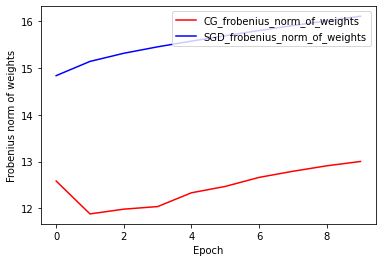

In [13]:
plt.plot(
    CG_frobenius_norm_of_weight,
    color='r',
    label='CG_frobenius_norm_of_weights')
plt.plot(
    SGD_frobenius_norm_of_weight,
    color='b',
    label='SGD_frobenius_norm_of_weights')
plt.xlabel('Epoch')
plt.ylabel('Frobenius norm of weights')
plt.legend(loc=1)

# Train and Validation Accuracy: CG vs SGD


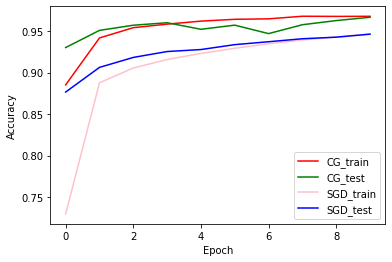

In [14]:
plt.plot(history_cg.history['accuracy'], color='r', label='CG_train')
plt.plot(history_cg.history['val_accuracy'], color='g', label='CG_test')
plt.plot(history_sgd.history['accuracy'], color='pink', label='SGD_train')
plt.plot(history_sgd.history['val_accuracy'], color='b', label='SGD_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=4)